# Лабораторная работа 7. Алгоритмы сортировки и поиска.

# 1. Алгоритмы сортировки.

In [1]:
ary = [0, 3, 5, 1, 2, 3, 5, 4, 2, 34, 43, 24]

# 1.1. Сортировка выбором

Алгоритм:
- найти наименьший элемент в неотсортированной части массива;
- поставить его в начало;
- сдвинуть начало неотсортированной части. 

Сложность: $O(n^2)$.

Программа:

In [3]:
def insertion_sort(arrayToSort):
    a = arrayToSort.copy()
    n = len(a)
    for i in range(n):
        v = a[i]
        j = i
        while (a[j - 1] > v) and (j > 0):
            a[j] = a[j - 1]
            j = j - 1
        a[j] = v
    return a

Тестовый запуск:

In [4]:
print(insertion_sort(ary))

[0, 1, 2, 2, 3, 3, 4, 5, 5, 24, 34, 43]


# 1.2. Сортировка вставками

Алгоритм:
- из неотсортированной части берется элемент;
- вставляется в отсортированную часть на своё место (в начале массива). 

Сложность: $O(n^2)$.

In [5]:
def insertion_sort(arrayToSort):
    a = arrayToSort.copy()
    n = len(a)
    for i in range(n):
        v = a[i]
        j = i
        while (a[j-1] > v) and (j > 0):
            a[j] = a[j-1]
            j = j - 1
        a[j] = v
    return a

In [6]:
print(insertion_sort(ary))

[0, 1, 2, 2, 3, 3, 4, 5, 5, 24, 34, 43]


# 1.3. Сортировка методом пузырька

Алгоритм:
- последовательно сравниваются пары элементов идущих друг за другом;
- в случае несоответствия выбранному порядку меняются местами. 

Сложность: $O(n^2)$.

In [7]:
def bubble_sort(arrayToSort):
    a = arrayToSort.copy()
    n = len(a)
    for i in range(n,0,-1):
        for j in range(1, i):
            if a[j-1] > a[j]:
                tmp = a[j-1]
                a[j-1] = a[j]
                a[j] = tmp
    return a

In [8]:
print(bubble_sort(ary))

[0, 1, 2, 2, 3, 3, 4, 5, 5, 24, 34, 43]


# 1.4. Сортировка слиянием

Алгоритм:
- сортируемый массив разбивается на две части примерно одинакового размера;
- каждая из получившихся частей сортируется отдельно, например — тем же самым алгоритмом;
- два упорядоченных массива половинного размера соединяются в один. 

Сложность: $O(n^2)$.

In [9]:
def merge_sort(arrayToSort):
    if len(arrayToSort)>1:
        mid = len(arrayToSort)//2
        lefthalf = arrayToSort[:mid]
        righthalf = arrayToSort[mid:]
        
        merge_sort(lefthalf)
        merge_sort(righthalf)
        
        i, j, k = 0, 0, 0       
        while i<len(lefthalf) and j<len(righthalf):
            if lefthalf[i]<righthalf[j]:
                arrayToSort[k]=lefthalf[i]
                i=i+1
            else:
                arrayToSort[k]=righthalf[j]
                j=j+1
            k=k+1
        while i<len(lefthalf):
            arrayToSort[k]=lefthalf[i]
            i=i+1; k=k+1
        while j<len(righthalf):
            arrayToSort[k]=righthalf[j]
            j=j+1; k=k+1

In [10]:
alist = ary
merge_sort(alist); 
print(alist)

[0, 1, 2, 2, 3, 3, 4, 5, 5, 24, 34, 43]


# 1.5. Быстрая сортировка

Алгоритм:
- выбрать (опорным) элемент из массива;
- перераспределить элементы в массиве так, что элементы меньше опорного помещаются перед ним, а больше или равные после;
- применить первые два шага к подмассивам слева и справа от опорных элементов, пока в подмассивах не останется не более одного элемента. 

Сложность: cредняя — $O(n log_2 n)$, худшая — $O(n^2)$.

In [11]:
def quick_sort(a, l, r):
    if (r > l):
        v, i, j = a[r], l - 1, r
        while (True):
            i, j = i + 1, j - 1                            
            while(a[i] < v): i = i + 1
            while(a[j] > v): j = j - 1
            if (i >= j): break
            a[i], a[j] = a[j], a[i]
        a[i], a[r] = a[r], a[i]
        quick_sort(a, l, i - 1)
        quick_sort(a, i + 1, r)

In [12]:
alist = ary
quick_sort(alist, 0, len(alist)-1)
print(ary)

[0, 1, 2, 2, 3, 3, 4, 5, 5, 24, 34, 43]


# Упражнение 1. Сортировка подсчётом.

Есть ли алгоритмы сортировки со сложностью, меньшей $O(n log_2 n)$?

Да, если известны свойства ключей. Например, если число возможных вариантов значений ограничено (и невелико) можно воспользоваться сортировкой подсчётом. 

Алгоритм:
- создать массив с числом эллементов равным количеству возможным вариантов ключа, заполнить его 0;
- перебрать (пройти) сортируемое множество подсчитывая количество ключей с конкретным значением (увеличивая на 1 значения соответствующего эллемента ранее созданного массива);
- записать подряд все ненулевые эллементы получившегося массива соответствующее его значению число раз.

Сложность: $O(n+k)$, где $k$ - число вариантов ключей.

Напишите программу (функцию) реализующую данный алгоритм.

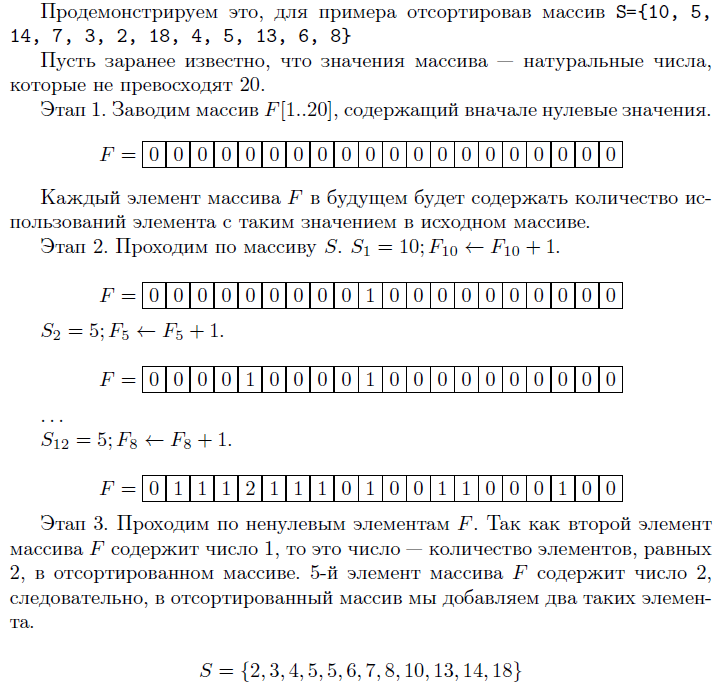

In [35]:
# Так можно добавлять картинки

from IPython.display import Image # вызов из библиотеки определённой функции
Image("Сортировка подсчётом.png")              # вызов функции и передача ей в качестве аргумента пути к файлу 

# (в данном случае фаил находится в той же папке)

In [13]:
import numpy as np

def counterSort(S):
    F = np.zeros(max(S) + 1)
    for si in S:
        F[si] += 1
    j = 0
    for i in range(len(F)):
        if F[i] != 0:
            for k in range(int(F[i])):
                S[j] = i
                j += 1
    return S

In [14]:
S = [10, 5, 14, 7, 3, 2, 18, 4, 5, 13, 6, 8]
print(counterSort(S))

[2, 3, 4, 5, 5, 6, 7, 8, 10, 13, 14, 18]


# Пример. Число $\pi$

In [15]:
from sympy import *
import numpy as np
import time
import pylab
import matplotlib.pyplot as plt

In [16]:
# Выведем заданное колличество знаков числа pi
npi=7;
print('Выведем %i знаков числа пи:\n' %npi, pi.n(npi));

Выведем 7 знаков числа пи:
 3.141593


Конвертируем дробную часть числа $\pi$ в список:

In [17]:
PI = [int(i) for i in str(pi.n(npi))[2:]]

In [18]:
PI

[1, 4, 1, 5, 9, 3]

Кроме того, можем считать цифры дробной части числа $\pi$ из файла (в котором храняться 10 000 000 его символов):

In [ ]:
f = open("pi-10million.txt")  #  открываем файл
fs = f.readline(npi)          #  считываем из него npi символов
f.close()                     #  закроем файл

In [ ]:
fs

In [ ]:
Pi = [int(i) for i in fs]
print(Pi)

# Упражнение. Сортировка $\pi$

Сравните временную сложность всех рассмотренных алгоритмов сортировки на примере цифр числа $\pi$.

Воспользуйтесь для этого замером времени с помощью библиотеки `time`. Пример:

In [23]:
start_time = time.time()
PI2 = insertion_sort(PI) 
Time = time.time() - start_time
print ('Отсортированные цифры числа пи:', PI2, sep = '\n')
print('Время, потраченное на сортировку, составило %15.7e секунд' % Time)

Отсортированные цифры числа пи:
[1, 1, 3, 4, 5, 9]
Время, потраченное на сортировку, составило   2.1815300e-04 секунд


Запишем отсортированный список в файл:

In [24]:
f1 = open("pi_sort.txt", 'w')
f1.writelines('%i' % i for i in PI2)
f1.close()

Проверим, что получилось:

In [25]:
f1 = open("pi_sort.txt", 'r')
fs = f1.readlines()          #  считываем всё содержимое файла
print(fs)
f1.close()

['113459']


Посмотрим, как меняются затраты времени на сортировку вставками при увеличении числа сортируемых объектов:

In [26]:
ik = 11
Tame = np.zeros((3,ik))
NPI = [(i+1)*50 for i in range(ik)]
i=0
for npi in NPI:
    PI = [int(i) for i in str(pi.n(npi))[2:]]
    start_time = time.time()
    PI2 = insertion_sort(PI) 
    Tame[0, i]=time.time()-start_time
    
    start_time = time.time()
    PI2 = insertion_sort(PI) 
    Tame[1, i]=time.time()-start_time
    
    start_time = time.time()
    PI2 = insertion_sort(PI) 
    Tame[2, i]=time.time()-start_time
    i+=1

	 size	 Tame(sec)
	 50 	 4.013e-04
	 100 	 1.207e-03
	 150 	 2.757e-03
	 200 	 5.120e-03
	 250 	 7.630e-03
	 300 	 1.135e-02
	 350 	 1.540e-02
	 400 	 2.097e-02
	 450 	 3.528e-02
	 500 	 3.212e-02
	 550 	 3.712e-02
	 50 	 9.449e-04
	 100 	 1.234e-03
	 150 	 2.816e-03
	 200 	 4.972e-03
	 250 	 7.457e-03
	 300 	 1.404e-02
	 350 	 1.519e-02
	 400 	 2.051e-02
	 450 	 2.825e-02
	 500 	 3.045e-02
	 550 	 3.713e-02
	 50 	 2.992e-04
	 100 	 1.193e-03
	 150 	 2.747e-03
	 200 	 4.737e-03
	 250 	 8.112e-03
	 300 	 1.166e-02
	 350 	 1.545e-02
	 400 	 3.759e-02
	 450 	 2.692e-02
	 500 	 3.059e-02
	 550 	 3.731e-02


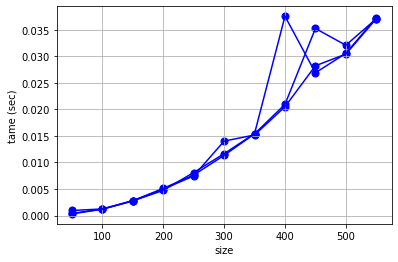

In [30]:
print('\t size\t Tame(sec)')
for i in range(0,ik):
    print ('\t %i \t %.3e' %(NPI[i], Tame[(0,i)]))
for i in range(0,ik):
    print ('\t %i \t %.3e' %(NPI[i], Tame[(1,i)]))
for i in range(0,ik):
    print ('\t %i \t %.3e' %(NPI[i], Tame[(2,i)]))

# график функции
pylab.figure ()
plt.plot(NPI, Tame[0], c='b')
plt.scatter(NPI, Tame[0], c='b',s=50)
plt.plot(NPI, Tame[1], c='b')
plt.scatter(NPI, Tame[1], c='b',s=50)
plt.plot(NPI, Tame[2], c='b')
plt.scatter(NPI, Tame[2], c='b',s=50)
# параметры графика
xl = plt.xlabel("size");
yl = plt.ylabel("tame (sec)");
plt.grid(True);
plt.show();

# Пример. Последовательный поиск

In [31]:
def dummy_search(a, key):
    n = len(a)
    for i in range(n):
        if a[i] == key:
            return i
    return n

In [32]:
ary = [7, 8, 1, 2, 3, 4, 13, 5, 1, 2, 44, 5, 1]
print(dummy_search(ary, 13))

6


In [33]:
# вероятно, чуть более рациональная реализация
def clever_search(a, key):
    n = len(a)
    i = 0
    while a[i] != key:
        i = i + 1
    return i

In [34]:
ary2 = [7, 8, 1, 2, 3, 4, 13, 5, 1, 2, 44, 5, 1, 44]
print(clever_search(ary2, 13))

6


In [35]:
%timeit dummy_search(ary, 44)
%timeit clever_search(ary2, 44)

3.05 µs ± 364 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.71 µs ± 155 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# Упражнение. Поиск в $\pi$

Найдите в дробной части числа $\pi$ порядковый номер каждой цифры, начиная с единицы, встретившейся `n`-ное количество раз, равное её значению (первую единицу, вторую двойку и т.д.).

In [36]:
npi = 100
PI = [int(i) for i in str(pi.n(npi))[2:]]

a = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
k = a.copy()

for i in range(npi - 2):
    a[PI[i]] += 1
    if PI[i] == a[PI[i]]:
        k[PI[i]] = i + 1

print(k)

[0, 1, 16, 17, 36, 48, 72, 96, 74, 55]


# Домашнее задание (базовое):

# Задание 1.

Найдите в числе $\pi$ номер цифры в дробной части, после которой идёт последовательность из:

- шести 9;
- шести 8;
- шести 0;
- первых шести цифр;
- семи цифр вашего номера телефона.

In [1]:
from sympy import *
import numpy as np

npi = 300000
PI = [int(i) for i in str(pi.n(npi))[2:]]

In [2]:
for i in range(npi - 7):
    if PI[i + 1 : i + 7] == [9, 9, 9, 9, 9, 9]:
        print(i)
        break

760


In [3]:
for i in range(npi - 7):
    if PI[i + 1 : i + 7] == [8, 8, 8, 8, 8, 8]:
        print(i)
        break

222297


Файл с 4 млн цифр числа Пи после запятой можно найти по [ссылке](https://sanstv.ru/pi).

In [17]:
f1 = open("pi.txt", 'r')
npi = 3999998
PIs = f1.readlines()
f1.close()
PI = []
for part in PIs:
    for n in part:
        if n != '.' and n != '\n':
            PI.append(int(n))

In [18]:
for i in range(npi - 7):
    if PI[i + 1 : i + 7] == [0, 0, 0, 0, 0, 0]:
        print(i)
        break

1699926


In [19]:
for i in range(npi - 7):
    if PI[i + 1 : i + 7] == [1, 2, 3, 4, 5, 6]:
        print(i)
        break

2458884


In [20]:
for i in range(npi - 7):
    if PI[i + 1 : i + 8] == [1, 9, 3, 2, 6, 1, 1]:
        print(i)
        break

431


# Задание 2. Поиск в отсортированном массиве

Реализуйте алгоритмы сужения области:

- [бинарный поиск](https://ru.wikipedia.org/wiki/%D0%94%D0%B2%D0%BE%D0%B8%D1%87%D0%BD%D1%8B%D0%B9_%D0%BF%D0%BE%D0%B8%D1%81%D0%BA)
- [метод золотого сечения](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B7%D0%BE%D0%BB%D0%BE%D1%82%D0%BE%D0%B3%D0%BE_%D1%81%D0%B5%D1%87%D0%B5%D0%BD%D0%B8%D1%8F)
- [интерполирующий поиск](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D0%BE%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%BF%D0%BE%D0%B8%D1%81%D0%BA).

In [21]:
def binarySearch(S, key):
    l = 0
    r = len(S) - 1
    while r - l > 1:
        m = (r + l) // 2
        if key > S[m]:
            l = m
        elif key < S[m]:
            r = m
        else:
            print('binarySearch:', m)
            return
            # важное пояснение: бинарный поиск не обязан искать первое вхождение, 
            # потому что он с самого начала сравнивает с серединой
    if S[l] == key:
        print('binarySearch:', l)
    elif S[r] == key:
        print('binarySearch:', r)
    else:
        print('binarySearch: not found')

In [22]:
def goldenCutSearch(S, key):
    phi = 0.5*(1 + 5 ** 0.5)
    a = 0
    b = len(S) - 1
    while b - a >= 1:
        x1 = int(b - (b - a)//phi)
        x2 = int(a + (b - a)//phi)
        A = S[a : x2 + 1]
        B = S[x1 : b + 1]
        if key in A:
            b = x2
        elif key in B:
            a = x1
        else:
            print('goldenCutSearch: not found')
            return
    print('goldenCutSearch:', a)

In [23]:
def interpolationSearch(S, key):
    l = 0
    r = len(S) - 1
    while S[l] < key < S[r]:
        m = int(l + ((key - S[l]) * (r - l)) / (S[r] - S[l]))
        if key > S[m]:
            l = m + 1
        elif key < S[m]:
            r = m - 1
        else:
            print('interpolationSearch:', m)
            return
    if S[l] == key:
        print('interpolationSearch:', l)
    elif S[r] == key:
        print('interpolationSearch:', r)
    else:
        print('interpolationSearch: not found')

In [24]:
S = list([7,8,1,2,3,4,13,5,1,2,44,5,1])
S.sort()
print(S)

[1, 1, 1, 2, 2, 3, 4, 5, 5, 7, 8, 13, 44]


In [25]:
M = [1, 3, 5, 7]
print(M)

[1, 3, 5, 7]


In [26]:
K = [1, 2, 3, 4, 5]
print(K)

[1, 2, 3, 4, 5]


In [27]:
U = [12.7, 9.1, 10.0012, 7.8]
U.sort()
print(U)

[7.8, 9.1, 10.0012, 12.7]


In [28]:
try:
    key = float(input('Введите значение ключа: '))
except ValueError:
    print('Вы ввели не число.')

A = list(map(float, input('Введите элементы массива через пробел: ').split()))

A.sort()
print('Отсортированный массив:', A, '\n')

print('Поиск:')
binarySearch(A, key)
goldenCutSearch(A, key)
interpolationSearch(A, key)

Введите значение ключа: 83
Введите элементы массива через пробел: 1 83 84 23 43 61
Отсортированный массив: [1.0, 23.0, 43.0, 61.0, 83.0, 84.0] 

Поиск:
binarySearch: 4
goldenCutSearch: 4
interpolationSearch: 4


# Задание 3.

Сравните производительность алгоритмов из задания 2 на задании 1.

In [32]:
npi = 1000
PI = [int(i) for i in str(pi.n(npi))[2:]]

In [33]:
D = {}
i = 0
for PI_i in PI:
    D[i] = PI_i
    i += 1

In [34]:
PI = list(D.values())

In [35]:
def dictionarySort(D):
    LOI = [] # list of indexes
    LOI = list(D.keys())
    
    # bubble sort method
    a = list(D.values())
    n = len(a)
    for i in range(n, 0, -1):
        for j in range(1, i):
            if a[j - 1] > a[j]:
                a[j - 1], a[j] = a[j], a[j - 1]
                LOI[j - 1], LOI[j] = LOI[j], LOI[j - 1]

    return LOI

In [36]:
LOI = dictionarySort(D)
print(LOI)

[31, 49, 53, 64, 70, 76, 84, 96, 105, 115, 120, 127, 131, 145, 158, 163, 166, 175, 194, 206, 244, 247, 263, 269, 286, 290, 306, 307, 310, 326, 329, 339, 356, 359, 360, 365, 368, 374, 397, 402, 407, 420, 442, 450, 492, 512, 519, 522, 542, 544, 551, 556, 560, 595, 600, 601, 602, 617, 637, 656, 658, 668, 681, 683, 702, 714, 719, 723, 745, 749, 754, 774, 780, 792, 801, 814, 817, 826, 837, 852, 854, 855, 856, 877, 884, 898, 908, 956, 967, 972, 973, 988, 995, 0, 2, 36, 39, 48, 67, 93, 94, 102, 109, 137, 147, 152, 153, 154, 162, 167, 173, 174, 197, 205, 219, 237, 242, 245, 249, 268, 280, 294, 296, 313, 318, 323, 341, 343, 361, 362, 380, 384, 389, 392, 394, 395, 416, 423, 426, 427, 431, 436, 437, 441, 444, 445, 470, 482, 489, 493, 494, 498, 524, 540, 546, 565, 567, 573, 586, 597, 606, 609, 626, 639, 645, 650, 659, 669, 680, 703, 708, 709, 711, 716, 727, 729, 733, 743, 751, 757, 758, 779, 785, 790, 796, 842, 845, 846, 849, 851, 853, 858, 881, 886, 888, 894, 920, 921, 944, 950, 960, 962, 970, 97

In [37]:
def searchForOrderedSubsequences(S, length):
    subs = []
    for i in range(len(S) - length + 1):
        for k in range(1, length):
            if S[i + k] + 1 != S[i + k + 1]:
                break
            if k == length - 1:
                subs.append(i)
    return subs

In [38]:
OSs = searchForOrderedSubsequences(LOI, 6)
for OS in OSs:
    print(LOI[OS + 1 : OS + 7])

[761, 762, 763, 764, 765, 766]


In [39]:
def sixNinesSearch(PI, D, OSs):
    PI.sort()
    for OS in OSs:
        if PI[OS + 1 : OS + 7] == [9, 9, 9, 9, 9, 9]:
            print('sixNinesSearch: found, index in original Pi number is', LOI[OS + 1] - 1)

In [40]:
sixNinesSearch(PI, D, OSs)

sixNinesSearch: found, index in original Pi number is 760


In [42]:
def modifiedBinarySearch(PI, LOI, keySequence):
    l = 0
    r = len(LOI) - 1 - len(keySequence)
    PI.sort()
    while r - l > 1:
        m = (r + l) // 2
        if keySequence > PI[m + 1 : m + len(keySequence) + 1]:
            l = m
        elif keySequence < PI[m + 1 : m + len(keySequence) + 1]:
            r = m
        else:
            for k in range(1, len(keySequence)):
                if not LOI[m + k] + 1 == LOI[m + k + 1]:
                    l += 1
                    k = False
                    break
            if not k:
                continue
            print('modifiedBinarySearch:', LOI[m + 1] - 1)
            return
    print('modifiedBinarySearch: not found')

Поиск не работает в любом случае, имхо, так как он сдвигается только вправо, а нужно бы проходить по всей последовательности этих чисел + ко всему нижеприведенный код не найдёт там неупорядоченную строку, а также строку, содержащую цифры через один.

Статус: `задание не решено`.

In [43]:
modifiedBinarySearch(PI, LOI, [9, 9, 9, 9, 9, 9])

modifiedBinarySearch: 760


# Домашнее задание (дополнительное):

# Задание "Пирамидальная сортировка"

Напишите программу (функцию), реализующую алгоритм [пирамидальной сортировки](https://ru.wikipedia.org/wiki/%D0%9F%D0%B8%D1%80%D0%B0%D0%BC%D0%B8%D0%B4%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%81%D0%BE%D1%80%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0) (также есть [статья на Хабре](https://habr.com/ru/post/221095/) и книга "Алгоритмы. Справочник с примерами на C, C , Java и Python" (Хайнеман Дж., и др - 2017), с. 87).

In [44]:
def heapSort(v):
    N = len(v)
    for j in range(N):
        for i in range(N // 2 - j // 2 - 1, -1, -1):
            if 2 * i + 2 <= N - 1 - j:
                if v[2 * i + 1] > v[2 * i + 2]:
                    if v[i] < v[2 * i + 1]:
                        v[i], v[2 * i + 1] = v[2 * i + 1], v[i]
                else:
                    if (v[i] < v[2 * i + 2]):
                        v[i], v[2 * i + 2] = v[2 * i + 2], v[i]
            else:
                if (2 * i + 1 <= N - 1 - j):
                    if (v[i] < v[2 * i + 1]):
                        v[i], v[2 * i + 1] = v[2 * i + 1], v[i]
        v[0], v[N - 1 - j] = v[N - 1 - j], v[0]
    for i in range(N):
        yield v[i]

In [45]:
array = list(map(int, input('Введите элементы массива через пробел: ').split()))
sorted = [ str(i) for i in heapSort(array) ]
print('Отсортированный массив: ' + ' '.join(sorted))

Введите элементы массива через пробел: 9 1 4 2
Отсортированный массив: 1 2 4 9


In [1]:
def heapify(arr, n, i):
    largest = i # Initialize largest as root
    l = 2 * i + 1   # left = 2*i + 1
    r = 2 * i + 2   # right = 2*i + 2
    if l < n and arr[i] < arr[l]:
        largest = l
    if r < n and arr[largest] < arr[r]:
        largest = r
    if largest != i:
        arr[i],arr[largest] = arr[largest],arr[i] # свап
        heapify(arr, n, largest)

def heapSort(arr):
    n = len(arr)
    for i in range(n, -1, -1):
        heapify(arr, n, i)
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i] # свап 
        heapify(arr, i, 0)

In [2]:
arr = [12, 11, 13, 5, 6, 7]
heapSort(arr)

In [3]:
arr

[5, 6, 7, 11, 12, 13]

Источник: [Хабр](https://habr.com/ru/company/otus/blog/460087/).

# Задание "Малые тела"

Есть база данных малых тел Солнечной системы, созданная под эгидой Международного астрономического союза. Файл с этой базой можно скачать [здесь](https://www.minorplanetcenter.net/iau/MPCORB/MPCORB.DAT), а [здесь](https://www.minorplanetcenter.net/iau/info/MPOrbitFormat.html) приведено его описание.

Отсортируйте эту базу по названию малого тела. Напишите две программы, реализующие поиск в отсортированном и неотсортированном массивах. В последнем случае поиск может производиться по любому параметру из таблицы.

In [1]:
def sortByTitle(arr):
    return arr[2][23] # сортируем по строке

filename = input('Введите имя файла (по умолчанию - MPCORB.DAT): ')
if filename == '':
    filename = 'MPCORB.DAT'

data = [] # структура данных: индекс, 
          #                   файловая строка, 
          #                   [ структура в соответствии с описанием ]

with open(filename, 'r') as f:
    k = False
    i = 0
    for line in f:
        if '--------' in line:
            k = True
            continue
        if k:
            s = []
            s.append(line[0 : 7])
            s.append(float(line[8 : 13]))
            s.append(float(line[14 : 19]))
            s.append(line[20 : 25])
            s.append(float(line[26 : 35]))
            s.append(float(line[37 : 46]))
            s.append(float(line[48 : 57]))
            s.append(float(line[59 : 68]))
            s.append(float(line[70 : 79]))
            s.append(float(line[80 : 91]))
            s.append(float(line[92 : 103]))
            s.append(line[105])
            s.append(line[107 : 116])
            s.append(int(line[117 : 122]))
            s.append(int(line[123 : 126]))
            s.append(int(line[127 : 131]))
            s.append(line[131])
            s.append(int(line[132 : 136]))
            s.append(line[137 : 141])
            s.append(line[142 : 145])
            s.append(line[146 : 149])
            s.append(line[150 : 160])
            s.append(line[161 : 165])
            s.append(line[166 : 194]) # тот самый кусок строки с названием объекта
            s.append(line[194 : 202])
            data.append([i, line, s])
            i += 1
    print('Прочитано и записано строк: %i' % i)

sorted_data = sorted(data, key=sortByTitle)
print('Сортировка завершена.')

Введите имя файла (по умолчанию - MPCORB.DAT): 


ValueError: could not convert string to float: ''

In [2]:
print('Прочитано и записано строк: %i' % i)

Прочитано и записано строк: 545135


In [3]:
sorted_data = sorted(data, key=sortByTitle)
print('Сортировка завершена.')

Сортировка завершена.


In [5]:
# поиск в несортированном массиве по имени малого тела
search_str = input('Введите строку поиска: ')
for i in range(len(data)):
    if search_str in data[i][2][23]:
        print('Совпадение в элементе %i несортированного массива. ' % i +
              'Планета - %s' % str(data[i][2][23]))
        print(data[i][1])

Введите строку поиска: Hooveria
Совпадение в элементе 931 несортированного массива. Планета -    (932) Hooveria           
00932   10.1   0.15 K205V 331.43567   50.02542   14.95652    8.11374  0.0905936  0.26190176   2.4194154  0 MPO525923  2385  39 1920-2020 0.39 M-v 38h Williams   0000    (932) Hooveria           20200106



In [6]:
print(data[931][2][1], type(data[931][2][1]))

10.1 <class 'float'>


In [8]:
# поиск в отсортированном массиве по любому из 25 свойств,
# запись всех свойств в доп. массив
j = int(input('Введите один из 25 индексов данных (целое число от 1 до 25) ' +
              '(подробнее: https://www.minorplanetcenter.net/iau/info/' + 
              'MPOrbitFormat.html): ')) - 1
search_str = input('Введите строку поиска: ')
selection = []
for i in range(len(sorted_data)):
    if type(sorted_data[i][2][j]) == type(str):
        if search_str in sorted_data[i][2][j]:
            print('Совпадение в элементе %i несортированного массива. ' % i +
                  'Значение - %s' % str(sorted_data[i][2][j]))
            print(sorted_data[i][1])
            selection.append(sorted_data[i])
    else:
        search_str = float(search_str)
        if search_str == sorted_data[i][2][j]:
            print('Совпадение в элементе %i несортированного массива. ' % i +
                  'Значение - %f' % float(sorted_data[i][2][j]))
            print(sorted_data[i][1])
            selection.append(sorted_data[i])

Введите один из 25 индексов данных (целое число от 1 до 25) (подробнее: https://www.minorplanetcenter.net/iau/info/MPOrbitFormat.html): 14
Введите строку поиска: 2625
Совпадение в элементе 40 несортированного массива. Значение - 2625.000000
00041    7.4   0.15 K205V 220.25379   45.93172  178.07248   15.78819  0.2750323  0.21480130   2.7612863  0 MPO525910  2625  63 1866-2020 0.47 M-v 38h Williams   0000     (41) Daphne             20200102

Совпадение в элементе 107 несортированного массива. Значение - 2625.000000
00108    8.0   0.15 K205V  42.16617  206.00387  349.97856    4.22024  0.0556404  0.16919836   3.2374665  0 MPO525911  2625  72 1880-2020 0.41 M-v 38h Williams   0000    (108) Hecuba             20200107

Совпадение в элементе 206 несортированного массива. Значение - 2625.000000
00207   10.1   0.15 K205V  73.72729  193.95481   29.17080    3.80172  0.0295908  0.28541617   2.2846359  0 MPO473763  2625  49 1885-2019 0.39 M-v 38h Williams   0000    (207) Hedda              2019051